# Rumex Demo

In [1]:
import os

import numpy as np
from sklearn.model_selection import train_test_split
from config import Config

from utils.dataset_utils import get_dataset, ImageViewer
from utils.unet_utils import Train

## Create Datasets


In [2]:
image_dir = 'data/imgs/'
mask_dir = 'data/msks/'

In [3]:
def create_subsets(image_list, mask_list, train_size=0.8):
    ind = np.arange(len(image_list))
    train_ind, val_ind = train_test_split(ind, train_size=train_size)
    train_image_list = [image_list[ind] for ind in train_ind]
    train_mask_list = [mask_list[ind] for ind in train_ind]
    val_image_list = [image_list[ind] for ind in val_ind]
    val_mask_list = [mask_list[ind] for ind in val_ind]
    return train_image_list, train_mask_list, val_image_list, val_mask_list


image_list = ['{}{}'.format(image_dir, image_name) for image_name in os.listdir(image_dir)]
mask_list = ['{}{}'.format(mask_dir, mask_name) for mask_name in os.listdir(mask_dir)]

assert len(image_list) == len(mask_list), 'Number of Images and Masks are not equal'

In [4]:
train_image_list, train_mask_list, val_image_list, val_mask_list = \
    create_subsets(image_list=image_list, mask_list=mask_list, train_size=0.8)

train_set = get_dataset(image_list=train_image_list,
                        mask_list=train_mask_list,
                        do_augmentations=True)

val_set = get_dataset(image_list=val_image_list,
                      mask_list=val_mask_list,
                      do_augmentations=False)

Got images_old with shape: (4, 512, 512, 3)
Got masks with shape: (4, 512, 512, 1)


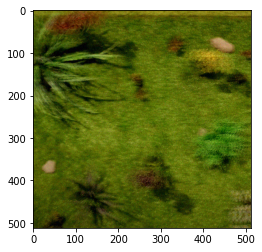

In [5]:
output = list(train_set.take(1))[0]
sample_img, sample_msk = output[0], output[1]

print('Got images_old with shape: {}'.format(sample_img.shape))
print('Got masks with shape: {}'.format(sample_msk.shape))

im = ImageViewer()
im.show_pair(img=sample_img.numpy()[0], msk=sample_msk.numpy()[0])

## Train Model

In [6]:
trainer = Train(train_set=train_set, val_set=val_set)

trainer.create_model(output_channels=1, backbone_name=Config.backbone_name, backbone_trainable=True)

print(trainer.model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:
trainer.fit(train_set_size=len(train_image_list))

Epoch 1/100
 Learning Rate: 0.0002
1/1 [==============================] - 50s 50s/step - loss: 0.9860 - my_dice_metric_foreground: 0.0081 - val_loss: 0.9215 - val_my_dice_metric_foreground: 0.1272

Epoch 00001: val_my_dice_metric_foreground improved from -inf to 0.12717, saving model to models\best_vgg19.h5
Epoch 2/100
 Learning Rate: 0.0002
1/1 [==============================] - 55s 55s/step - loss: 0.9662 - my_dice_metric_foreground: 0.0440 - val_loss: 0.9422 - val_my_dice_metric_foreground: 0.0830

Epoch 00002: val_my_dice_metric_foreground did not improve from 0.12717
Epoch 3/100
 Learning Rate: 0.0002
1/1 [==============================] - 49s 49s/step - loss: 0.9409 - my_dice_metric_foreground: 0.0883 - val_loss: 0.9318 - val_my_dice_metric_foreground: 0.1109

Epoch 00003: val_my_dice_metric_foreground did not improve from 0.12717
Epoch 4/100
 Learning Rate: 0.0002
Traceback (most r

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



TypeError: object of type 'NoneType' has no len()

## Inference
